In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
file = pd.read_csv("Social_Network_Ads.csv")

In [11]:
file.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
X = file.iloc[:,2:4]

In [13]:
y = file.iloc[:,-1]

In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test =  train_test_split(X,y, test_size=0.20)

In [23]:
X_train.shape

(320, 2)

In [24]:
X_test.shape

(80, 2)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.26823849, -0.66867905],
       [-1.02367361,  0.41705326],
       [ 1.43149054,  1.00393559],
       [-0.74038544,  0.29967679],
       [ 1.80920811, -1.2849055 ],
       [ 0.8649142 ,  2.17770024],
       [-0.92924422, -0.43392612],
       [ 0.95934359, -1.19687315],
       [ 0.95934359,  0.76918265],
       [-1.30696178, -0.43392612],
       [ 0.01504968,  0.03557974],
       [-0.55152666,  1.47344145],
       [-0.55152666,  1.3854091 ],
       [ 0.77048481, -1.37293785],
       [-0.64595605, -1.51965843],
       [ 1.71477872, -0.28720554],
       [-0.83481483,  0.38770914],
       [-0.26823849, -1.31424962],
       [ 1.05377298, -0.14048496],
       [-1.77910874, -1.43162608],
       [-0.74038544, -0.60999082],
       [ 1.43149054, -1.05015257],
       [ 0.95934359,  1.88425908],
       [-0.1738091 ,  2.17770024],
       [ 0.77048481,  0.53442972],
       [ 1.33706115, -0.9327761 ],
       [ 2.09249628, -1.05015257],
       [-0.64595605, -1.60769078],
       [-0.26823849,

In [27]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.29833786,  0.29967679],
       [-1.02367361,  0.59311795],
       [-0.26823849,  0.79852677],
       [-0.55152666,  2.35376494],
       [-0.55152666,  0.47574149],
       [ 0.10947907,  0.03557974],
       [-1.49582057, -0.43392612],
       [-0.1738091 ,  1.41475322],
       [ 0.01504968,  0.29967679],
       [ 1.99806689, -1.19687315],
       [-1.30696178, -0.43392612],
       [ 1.71477872,  1.00393559],
       [-0.64595605, -1.05015257],
       [ 0.48719664,  1.23868852],
       [-0.26823849, -0.58064671],
       [-1.02367361, -1.4609702 ],
       [-1.59024996, -0.05245261],
       [ 1.05377298,  0.56377384],
       [-0.45709727, -1.22621727],
       [ 0.8649142 , -0.66867905],
       [ 1.62034932, -0.90343199],
       [-0.55152666,  1.3854091 ],
       [ 0.20390847, -0.37523789],
       [-0.26823849, -0.43392612],
       [-1.77910874,  0.18230032],
       [-0.26823849, -0.90343199],
       [-0.07937971, -1.07949669],
       [ 0.67605542, -1.40228197],
       [ 0.39276725,

# square root method to choose val of k 

In [29]:
np.sqrt(X_train.shape[0])

17.88854381999832

In [30]:
k = 17

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [33]:
y_pred= knn.predict(X_test)

In [34]:
y_pred.shape

(80,)

In [35]:
y_test.shape

(80,)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.95

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[49,  3],
       [ 1, 27]], dtype=int64)

## trail error method to find k 

In [39]:
accuracy= []

for i in range(1,26):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [40]:
len(accuracy)

25

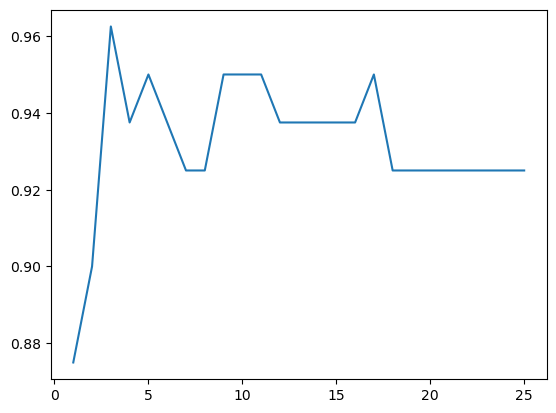

In [41]:
plt.plot(range(1,26),accuracy)

In [42]:
knn= KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [43]:
y_pred=knn.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred)

0.95

In [45]:
def predict_output():
    age = int(input('enter the age: '))
    salary = int(input('enter the salary: '))
    X_new = np.array([[age],[salary]]).reshape(1,2)
    X_new = scaler.transform(X_new)
    if knn.predict(X_new)[0]==0:
        return "will not purchase"
    else:
        return "will purchase"

In [46]:
predict_output()

enter the age:  55
enter the salary:  55


C:\Users\254\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'will purchase'

# few observation
## hyperparameters or tuning noobs
## methods to choose k val
 depends on us use both as a beginneers

Plotting a func using meshgird 

In [90]:
import numpy as np
x=np.linspace(-40,40,1000)
y=np.linspace(-50,50,900)

XX,YY=np.meshgrid(X,y)

In [92]:
Z = np.random.random((900,1000))


In [96]:
x = np.linspace(-40, 40, 1000)  # x has 1000 points
y = np.linspace(-50, 50, 900)  # y has 900 points

# Create a meshgrid from x and y
XX, YY = np.meshgrid(x, y)

# Create a random Z matrix that matches the meshgrid shape
Z = np.random.random((900, 1000))  # 900 rows and 1000 columns, matching the meshgrid


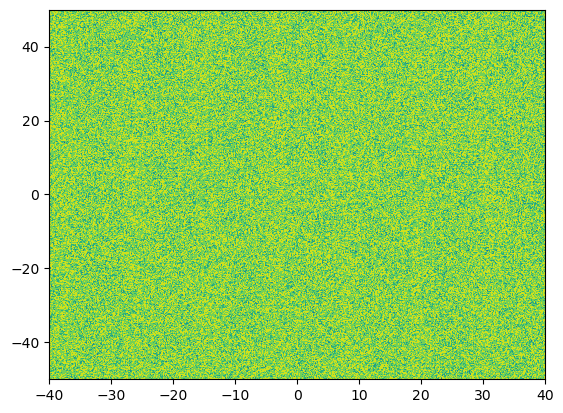

In [98]:
# Plotting the contour plot
plt.contourf(XX, YY, Z)

CREATING A MESHGRID

In [107]:
a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1,step=0.01)
b=np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1,step=0.01)

In [103]:
a

array([-2.87353813, -2.86353813, -2.85353813, -2.84353813, -2.83353813,
       -2.82353813, -2.81353813, -2.80353813, -2.79353813, -2.78353813,
       -2.77353813, -2.76353813, -2.75353813, -2.74353813, -2.73353813,
       -2.72353813, -2.71353813, -2.70353813, -2.69353813, -2.68353813,
       -2.67353813, -2.66353813, -2.65353813, -2.64353813, -2.63353813,
       -2.62353813, -2.61353813, -2.60353813, -2.59353813, -2.58353813,
       -2.57353813, -2.56353813, -2.55353813, -2.54353813, -2.53353813,
       -2.52353813, -2.51353813, -2.50353813, -2.49353813, -2.48353813,
       -2.47353813, -2.46353813, -2.45353813, -2.44353813, -2.43353813,
       -2.42353813, -2.41353813, -2.40353813, -2.39353813, -2.38353813,
       -2.37353813, -2.36353813, -2.35353813, -2.34353813, -2.33353813,
       -2.32353813, -2.31353813, -2.30353813, -2.29353813, -2.28353813,
       -2.27353813, -2.26353813, -2.25353813, -2.24353813, -2.23353813,
       -2.22353813, -2.21353813, -2.20353813, -2.19353813, -2.18

In [105]:
a.shape

(597,)

In [109]:
b.shape

(597,)

In [111]:
XX,YY=np.meshgrid(a,b)

In [115]:
YY.shape

(597, 597)

classifying every point on the meshgrid

In [122]:
print(YY[0][0])
print(XX[0][0])

-2.607690782179935
-2.873538128342537


In [146]:

input_array = np.array([XX.ravel(), YY.ravel()]).T  

labels = knn.predict(input_array)

In [148]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

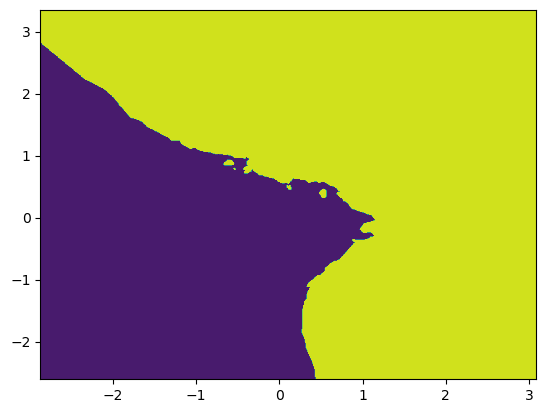

In [152]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

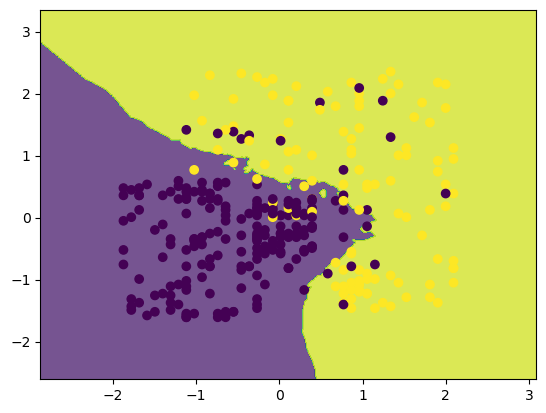

In [160]:
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)